In [1]:
import pandas as pd 
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 
from arch import arch_model 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np 

In [4]:
data=pd.read_csv('dataset.csv')
data.set_index('Date',inplace=True)

In [82]:
Pct=100*data.Close.pct_change().dropna()

Text(0.5, 1.0, 'Variance of Pct')

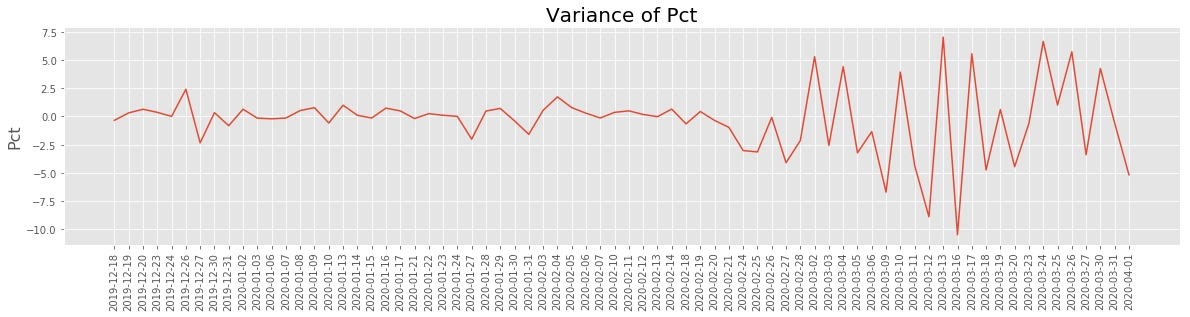

In [93]:
plt.style.use('ggplot')
plt.figure(figsize=(20,4))
plt.plot(Pct)
plt.xticks(rotation=90)
plt.ylabel('Pct', fontsize=16)
plt.title('Variance of Pct',fontsize=20)


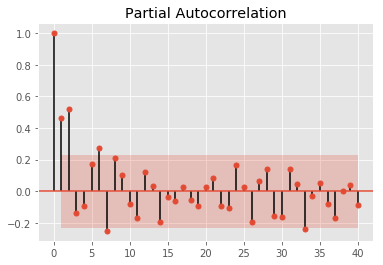

In [94]:
plot_pacf(returns**2,lags=40)
plt.show()

In [16]:
model=arch_model(returns,p=1,q=1)
model_fit=model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 149.59899959919287
Iteration:      2,   Func. Count:     15,   Neg. LLF: 146.7016356850289
Iteration:      3,   Func. Count:     22,   Neg. LLF: 145.74673150720736
Iteration:      4,   Func. Count:     29,   Neg. LLF: 145.43394666606028
Iteration:      5,   Func. Count:     35,   Neg. LLF: 145.30191460961248
Iteration:      6,   Func. Count:     41,   Neg. LLF: 145.29219539393296
Iteration:      7,   Func. Count:     47,   Neg. LLF: 145.29047325159496
Iteration:      8,   Func. Count:     53,   Neg. LLF: 145.29046242259787
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 145.29046247537684
            Iterations: 8
            Function evaluations: 53
            Gradient evaluations: 8


In [18]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.019
Mean Model:             Constant Mean   Adj. R-squared:                 -0.019
Vol Model:                      GARCH   Log-Likelihood:               -145.290
Distribution:                  Normal   AIC:                           298.581
Method:            Maximum Likelihood   BIC:                           307.688
                                        No. Observations:                   72
Date:                Sun, Aug 23 2020   Df Residuals:                       68
Time:                        19:44:50   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1285      0.139      0.924      0.355 [ -0.144,  0.401]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2338      0.123      1.900  5.745e-02 [-7.395e-03,  0.475]
alpha[1]       0.4125      0.159      2.603  9.253e-03    [  0.102,  0.723]
beta[1]        0.5875      0.120      4.889  1.015e-06    [  0.352,  0.823]
===========================================================================

Covariance estimator: robust
"""

In [81]:
rolling_predictions=[]
test_size=30
for i in range (test_size):
    train=returns[:-(test_size-i)]
    model=arch_model(train,p=2,q=3)
    model_fit=model.fit(disp='off')
    pred=model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    

In [78]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-30:])

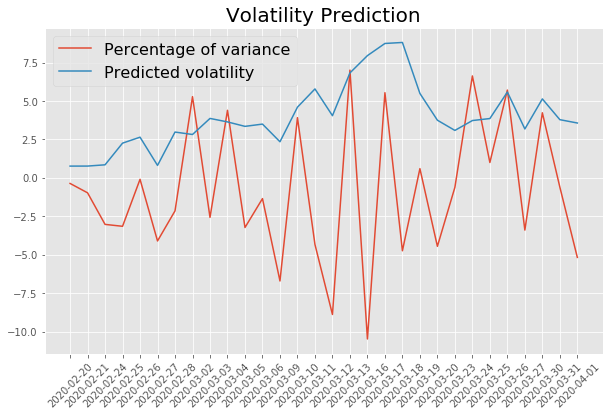

In [95]:
plt.figure(figsize=(10,6))
true,=plt.plot(returns[-30:])
plt.xticks(rotation=45)
preds,=plt.plot(rolling_predictions)
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['Percentage of variance','Predicted volatility'],fontsize=16)
